# **Chapter 17: Interpolation**


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

### **17.1 Interpolation Problem Statement**

Assume we have a set of data with values $y_i$ dependant upon the values of $x_i$. We want to find an estimation function $\hat{y}(x)$ such that $\hat{y}(x_i)=y_i$. 

If we are given a new $x$ value, $x_*$; we can interpolate its $y$ value using $\hat{y}(x_*)$. And $\hat{y}(x)$ is called the interpolation equation.

Below is an example of the interpolation problem statement. With $x_*$ being our unknown value.

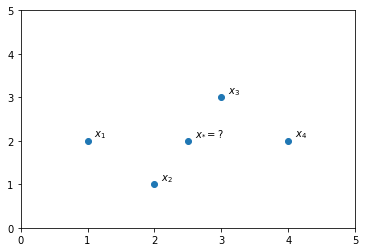

In [ ]:
x = [1, 2, 2.5, 3, 4]
y = [2, 1, 2, 3, 2]
n = ["$x_{1}$", "$x_{2}$", "$x_{*}=?$", "$x_{3}$", "$x_{4}$"]

plt.scatter(x, y)
plt.axis([0,5, 0, 5])
for i, txt in enumerate(n):
  plt.annotate(txt, (x[i] + 0.1, y[i] + 0.1))
plt.show()

### **17.2 Linear Interpolation**

In linear interpolation the point is assumed to lie on the line joining the nearest points to the left and right of it. Assuming $x$ is increasing, then for point $x$: $$\hat{y}(x)=y_i+\frac{(y_{i+1}-y_i)(x-x_i)}{x_{i+1}-x_i}$$

The figure below illustrates this using the 'interp1d' function.

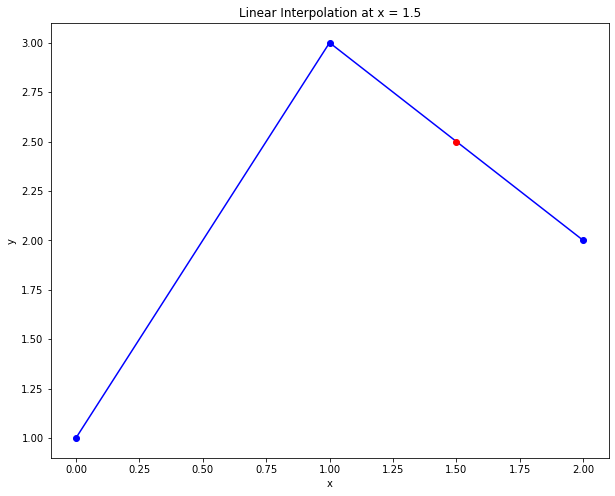

In [ ]:
from scipy.interpolate import interp1d

x = [0, 1, 2]
y = [1, 3, 2]
f = interp1d(x, y)
y_hat = f(1.5)

plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### **17.3 Cubic Spline Interpolation**

With cubic spline interpolation, the interpolating function is a set of piecewise cubic functions. Specifically, we assume that successive points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ are joined by a cubic polynomial $S_i(x)=a_ix^3+b_ix^2+c_ix+d_i$. For n points, there are $n−1$ cubic functions to find, and each cubic function requires four coefficients. Therefore we have a total of $4(n−1)$ unknowns, and so we need $4(n−1)$ independent equations to find all the coefficients.

First, we know that the data points are where each equation intersecs, therefore: $$S_i=y_i, i=1,...,n-1$$ $$S_{i+1}=y_{i+1}, i=1,...,n-1$$
This gives us $2(n-1)$ equations.

We want each equation to join together at the known data points as smoothly as possible, so we set a constraint that they have continuous first and second derivatives at the known data points. So: $$S_i'(x_{i+1})=S_{i+1}'(x_{i+1}), i=1,...,n-2$$ $$S_i''(x_{i+1})=S_{i+1}''(x_{i+1}), i=1,...,n-2$$

This gives us $2(n-2)$ equations. We have 2 more to go. Commonly, it is assumed the second derivatives are zero at the endpoints, namely: $$S_1''(x_1)=0$$ $$S_{n-1}''(x_n)=0$$

Scipy has a CubicSpline function to help us with the calculations. 

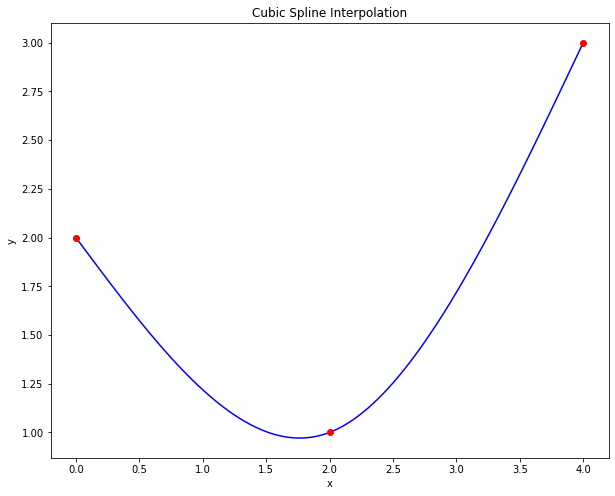

In [ ]:
from scipy.interpolate import CubicSpline

x = [0, 2, 4]
y = [2, 1, 3]

#bc_type = 'natural' adds the constraints for the endpoints
f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0, 4, 100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()